# Exploración de base de diabetes

Exploración de base de datos para estudio de diabetes usando TDA.

## Análisis  Exploratorio de Datos

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../db/diabetes.csv") # Lectura de la db
dfcopy  = df.copy() # Creamos una copia de la db para mantener intactos sus datos
diabetes = dfcopy[dfcopy['SkinThickness']!=0]
diabetes = diabetes[diabetes['Glucose']!=0]
diabetes = diabetes.reset_index(drop=True) # db tratada y lista

En el código anterior, inspeccionando la base de datos descubrimos que habían personas registradas con un grosor de piel igual a 0, lo cual es una situación irreal, por lo cual decidimos eliminar dichos elementos de la base dado que representaban el 30.4% de nuestros datos. De manera similar, un organismo vivo no puede tener una glucosa en sangre igual a cero, por lo cual también decidimos eliminar dichos datos dado que representaban el 0.6% de nuestros datos.

In [3]:
#diabetes.head(15)

In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               536 non-null    int64  
 1   Glucose                   536 non-null    int64  
 2   BloodPressure             536 non-null    int64  
 3   SkinThickness             536 non-null    int64  
 4   Insulin                   536 non-null    int64  
 5   BMI                       536 non-null    float64
 6   DiabetesPedigreeFunction  536 non-null    float64
 7   Age                       536 non-null    int64  
 8   Outcome                   536 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 37.8 KB


In [5]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000
mean,3.518657,120.940299,71.231343,29.149254,114.296642,32.773134,0.506013,31.585821,0.332090
std,3.332596,30.931159,13.022146,10.494686,122.852178,7.151748,0.347545,10.758005,0.471403
min,0.000000,56.000000,0.000000,7.000000,0.000000,0.000000,0.085000,21.000000,0.000000
25%,1.000000,98.750000,64.000000,22.000000,0.000000,27.800000,0.259000,23.000000,0.000000
50%,2.000000,115.000000,72.000000,29.000000,90.000000,32.800000,0.420000,28.000000,0.000000
75%,5.000000,141.000000,80.000000,36.000000,165.000000,36.900000,0.660250,38.000000,1.000000
max,17.000000,199.000000,110.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Notemos que existen datos con IMC nulo, lo que no es posible. Decidimos eliminarlos pues representan el 0.2% de los datos y no son singnificativos para ningún sector se la muestra.

In [6]:
diabetes = diabetes[diabetes["BMI"] > 0]
diabetes = diabetes.reset_index(drop=True)

## Elección de estudio y normalización de datos

Primero, normalizamos los datos.

In [7]:
import numpy as np

In [8]:
columnas = diabetes.columns.tolist()
normas = []

def norma(columna: str) -> float:
    # Definimos la columna como un arreglo de numpy
    vector = np.array(columna)
    # calculamos la norma como l2
    try:
        norma = np.sqrt(np.dot(vector, vector))
        return float(norma)
    except Exception as e:
        print(e)

for columna in columnas:
    normas.append(float(norma(diabetes[columna])))

for norma, columna in zip(normas, columnas):
    diabetes[columna] = diabetes[columna] / norma

In [20]:
conDiabetes = diabetes[diabetes['Outcome']!=0]
sinDiabetes = diabetes[diabetes['Outcome']==0]

In [10]:
import matplotlib.pyplot as plt

def graficar_puntos(col1: str, col2: str):
    plt.figure(figsize=(6,4))
    plt.scatter(diabetes[col1], diabetes[col2])
    plt.title(f"{col1} según {col2}")
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

Por un interés particular en la distribución de nuestros datos de Glucosa y Presión en Sangre, tomamos la decisión de dedicar nuestro esfuerzo a realizar el método Maper sobre dichos datos.

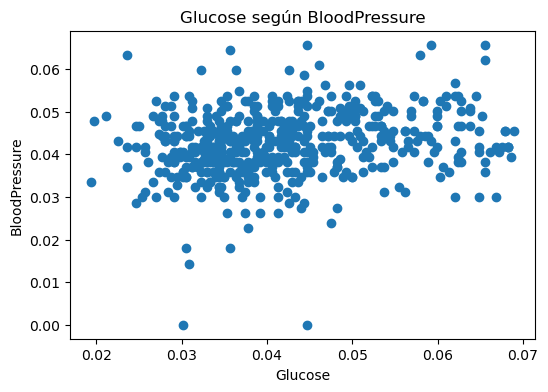

In [11]:
from itertools import combinations

# Elegir tamaño de subconjuntos para validación cruzada
#k = 2
#parejas = combinations(columnas, k)
#for pareja in parejas:
#    graficar_puntos(pareja[0], pareja[1])


graficar_puntos('Glucose','BloodPressure')

## Medir qué tan buena es una combinación

In [12]:
correlaciones = diabetes.corr()
correlaciones

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.126521,0.166812,0.095233,-0.010685,0.014433,0.007719,0.641392,0.258172
Glucose,0.126521,1.000000,0.214870,0.227494,0.460075,0.248155,0.163997,0.279953,0.503972
BloodPressure,0.166812,0.214870,1.000000,0.218153,0.025798,0.284699,-0.002432,0.320844,0.165146
SkinThickness,0.095233,0.227494,0.218153,1.000000,0.126885,0.647163,0.117688,0.161873,0.255178
Insulin,-0.010685,0.460075,0.025798,0.126885,1.000000,0.189841,0.149484,0.079926,0.210121
BMI,0.014433,0.248155,0.284699,0.647163,0.189841,1.000000,0.150331,0.076096,0.303279
DiabetesPedigreeFunction,0.007719,0.163997,-0.002432,0.117688,0.149484,0.150331,1.000000,0.071003,0.231854
Age,0.641392,0.279953,0.320844,0.161873,0.079926,0.076096,0.071003,1.000000,0.317722
Outcome,0.258172,0.503972,0.165146,0.255178,0.210121,0.303279,0.231854,0.317722,1.000000


 # Maper

## Implementación de la función Lente

In [13]:
def lente(arr1) -> float:
  return np.sum(arr1)

columnas = list(diabetes.columns)
parejas = combinations(columnas, 2)

dic_imagenes = {}
for pareja in parejas:
    imagenes = []
    df_temp = diabetes[list(pareja)]
    try:
        for i in range(len(df_temp)):
            punto1 = df_temp.iloc[i].values
            imagenes.append(lente(punto1))
        dic_imagenes[pareja] = imagenes
    except Exception as e:
      print(f"error: {e}")

dic_imagenesNorm = {}
parejas = combinations(columnas, 2)
for pareja in parejas:
    imagenes = []
    for valor in dic_imagenes[pareja]:
        imagenes.append(valor / max(dic_imagenes[pareja]) )
    dic_imagenesNorm[pareja] = imagenes



## Iteraciones

In [14]:
def iteraciones(iter: int):
  list = []
  deno=4+2*iter
  for i in range(deno):
    list.append(i/deno)
  list.append(1)
  return list

def cobertura(lista: list):
  cobertura = []
  ran = len(lista)//2
  for i in range(1,ran):
    cobertura.append([lista[2*i-2], lista[2*(i)]])
    cobertura.append([lista[2*i-1], lista[2*(i)+1]])
  cobertura.append([lista[2*ran-2], lista[2*ran]])
  return cobertura

dic_coberturas = {}
dic_coberturas[1] = cobertura(iteraciones(1))


## Pullback (Preimagen)

In [15]:
def intervalos_pullback(dic_imagenesNorm, columnas, dic_coberturas) -> dict:
    dic_pullback = {}

    for i in dic_coberturas.keys(): # Itera sobre cada intervalo de la cobertura
        pullback = {}
        for j in range(len(dic_coberturas[i])):
          a = dic_coberturas[i][j][0]
          b = dic_coberturas[i][j][1]


          # Inicializa el conjunto para el intervalo actual en el diccionario `dic_pullback`
          pullback[f"{j}"] = set()
          print(pullback)

          # Genera las parejas cada vez que se comienza una nueva iteración en `dic_coberturas`
          for pareja in combinations(columnas, 2):  # Selecciona la pareja de columnas
              for llave in range(len(dic_imagenesNorm[tuple(pareja)])):  # Itera sobre los valores de dic_imagenesNorm
                  if a <= dic_imagenesNorm[pareja][llave] <= b:
                      pullback[f"{j}"].add(llave)
              dic_pullback[pareja] = pullback

          # Opcional: print para revisar el pullback del intervalo actual
          print(f"Pullback para el intervalo {pareja}:", dic_pullback[pareja])

    return dic_pullback


def intervalos_pullback0(dic_imagenesNorm, columnas, dic_coberturas, pareja) -> dict:
    dic_pullback = {}
    # Itera sobre cada intervalo de la cobertura
    for i in dic_coberturas.keys():  
        pullback = {}
        for j in range(len(dic_coberturas[i])):
          a = dic_coberturas[i][j][0]
          b = dic_coberturas[i][j][1]


    # Inicializa el conjunto para el intervalo actual 
    # en el diccionario `dic_pullback`
          pullback[f"{j}"] = set()

    # Genera las parejas cada vez que se comienza una 
    # nueva iteración en `dic_coberturas`
          # Itera sobre los valores de dic_imagenesNorm
          for llave in range(len(dic_imagenesNorm[tuple(pareja)])):  
              if a <= dic_imagenesNorm[pareja][llave] <= b:
                  pullback[f"{j}"].add(llave)
          dic_pullback[pareja] = pullback

    return dic_pullback


## Clusters

<Figure size 600x400 with 0 Axes>

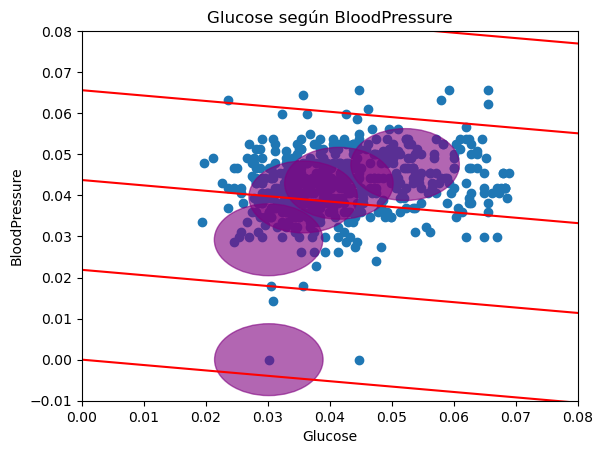

<Figure size 600x400 with 0 Axes>

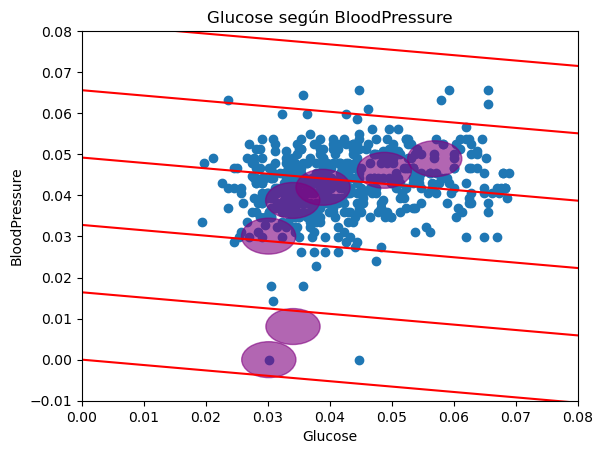

<Figure size 600x400 with 0 Axes>

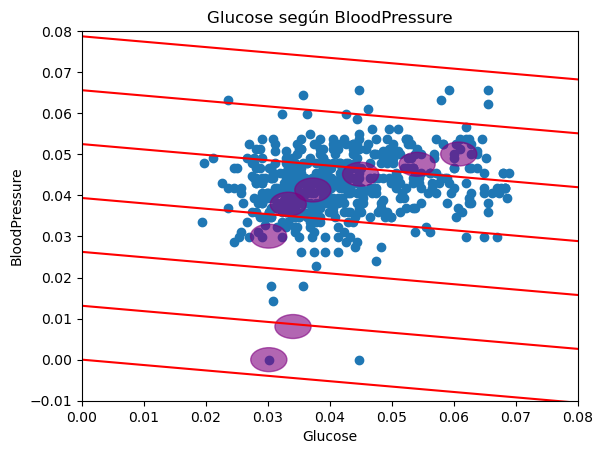

<Figure size 600x400 with 0 Axes>

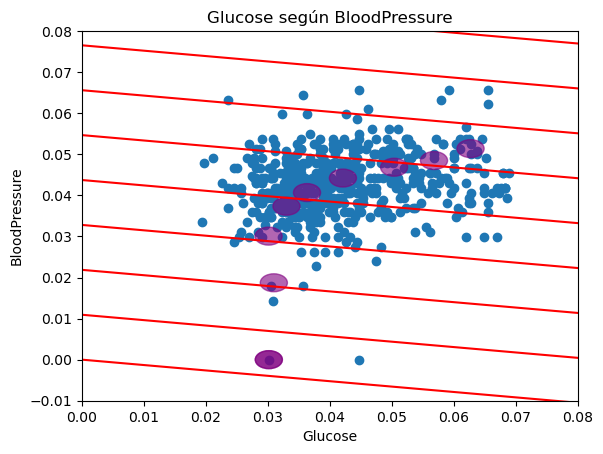

<Figure size 600x400 with 0 Axes>

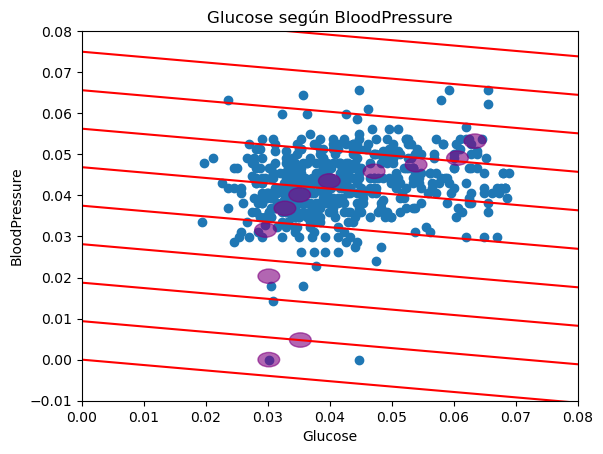

In [16]:
clusters = intervalos_pullback0(dic_imagenesNorm, columnas, dic_coberturas, ('Glucose', 'BloodPressure'))

def medias(col: str, lista: list) -> float:
    dfTemp = diabetes[col]
    suma = 0
    for val in lista:
        suma += dfTemp.loc[val]
    try:
        suma = suma/len(lista)
    except ZeroDivisionError:
        suma = None
    return suma

def elementosCobertura(col1, col2, iterar: int) -> list:
    imagenTemp = dic_imagenesNorm[(col1, col2)] 
    valores = cobertura(iteraciones(iterar))
    part = [] # Guarda los indices de cada particion
    for i in range(len(valores)):
        particion = []
        for j in range(len(imagenTemp)):
            if imagenTemp[j] >= valores[i][0] and imagenTemp[j] < valores[i][1]:
                particion.append(j)
        part.append(particion)
    return part

def coordenadasCirc(col1, col2, iterar: int) -> list:
    coord = [] # Proporciona el formato para generar los nodos
    centros = []
    vecMax = max(dic_imagenes[(col1, col2)])
    
    part = elementosCobertura(col1, col2, iterar)
    
    for i in range(len(part)):
        mediaX = medias(col1, part[i])
        mediaY = medias(col2, part[i])
        if mediaX != None and mediaY != None:
            coord.append(((mediaX,mediaY), vecMax/(15*iterar), 'purple'))
            centros.append([mediaX, mediaY])
    return coord

def graficarParticiones(col1, col2, iterar: int):
    plt.figure(figsize=(6,4))

    fig, ax = plt.subplots()

    vecMax = max(dic_imagenes[(col1, col2)])

    for i in iteraciones(iterar):
        x = np.linspace(-.01, 1, 100)
        c = i
        f_x = (c - x)*vecMax
        plt.plot(x, f_x, color="red")
        plt.xlim(0, 0.08)  # Limitar el eje x
        plt.ylim(-.01, 0.08)  # Limitar el eje y
        
    plt.scatter(diabetes[col1], diabetes[col2])
    plt.title(f"{col1} según {col2}")
    plt.xlabel(col1)
    plt.ylabel(col2)

    # Generamos los nodos
    circulos = coordenadasCirc('Glucose', 'BloodPressure', iterar)
    # Graficamos los nodos
    for (pos, radio, color) in circulos:
        circle = plt.Circle(pos, radio, color=color, fill=True, alpha=0.6)
        ax.add_artist(circle)

    plt.show()

for i in range(1,6):
    graficarParticiones('Glucose', 'BloodPressure', i)

## Resultado

<Figure size 600x400 with 0 Axes>

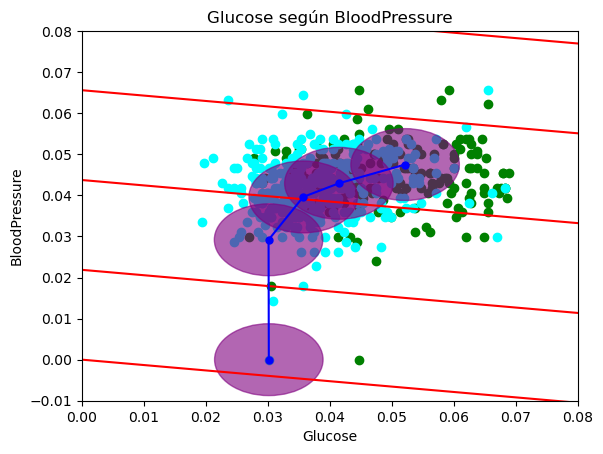

<Figure size 600x400 with 0 Axes>

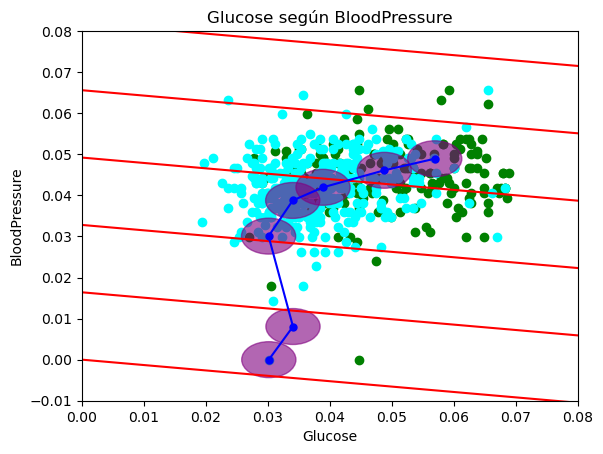

<Figure size 600x400 with 0 Axes>

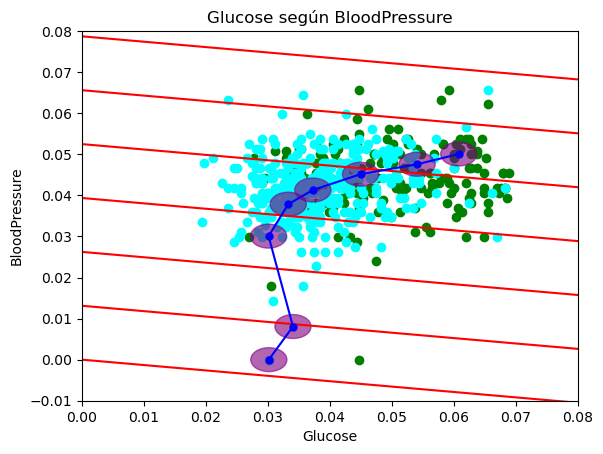

<Figure size 600x400 with 0 Axes>

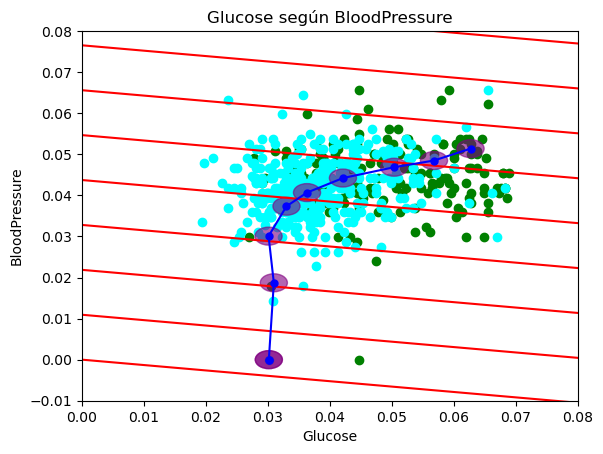

<Figure size 600x400 with 0 Axes>

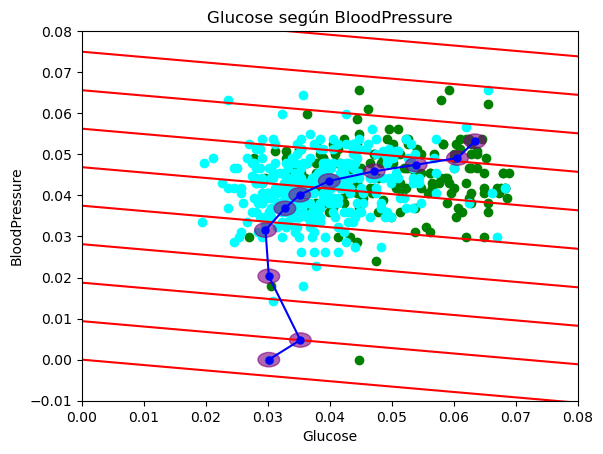

<Figure size 600x400 with 0 Axes>

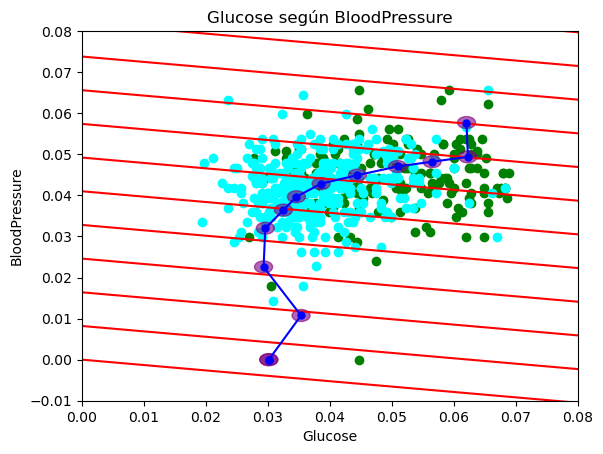

<Figure size 600x400 with 0 Axes>

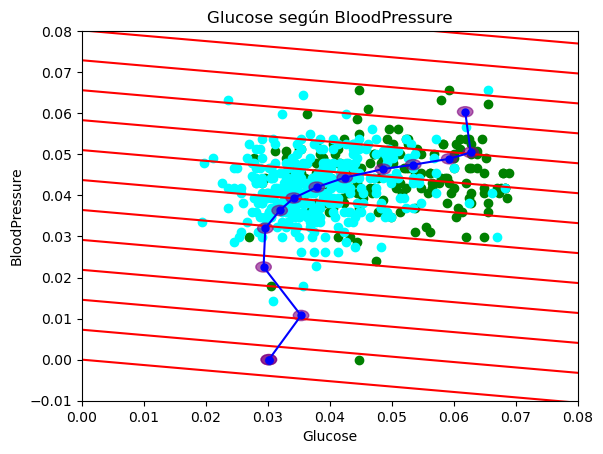

<Figure size 600x400 with 0 Axes>

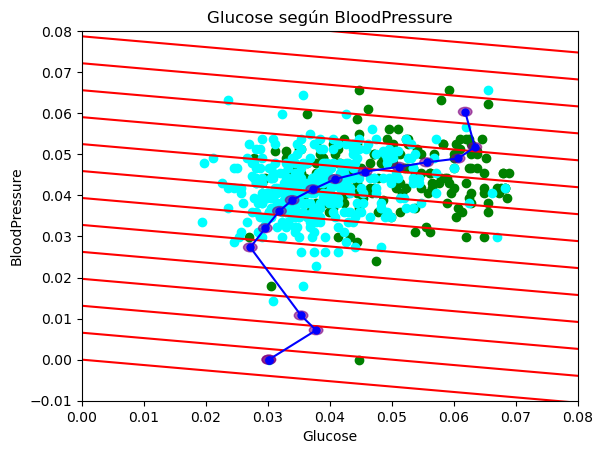

<Figure size 600x400 with 0 Axes>

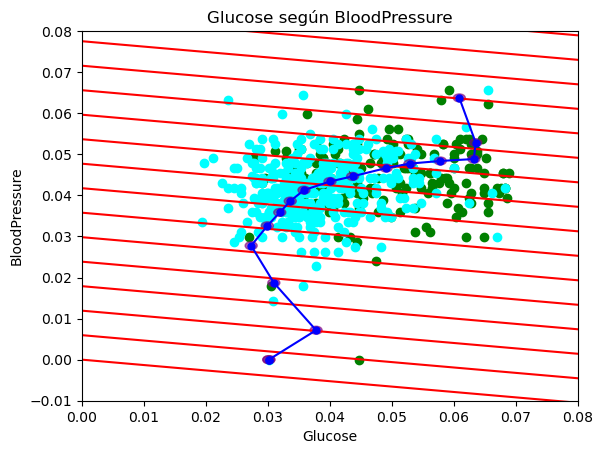

<Figure size 600x400 with 0 Axes>

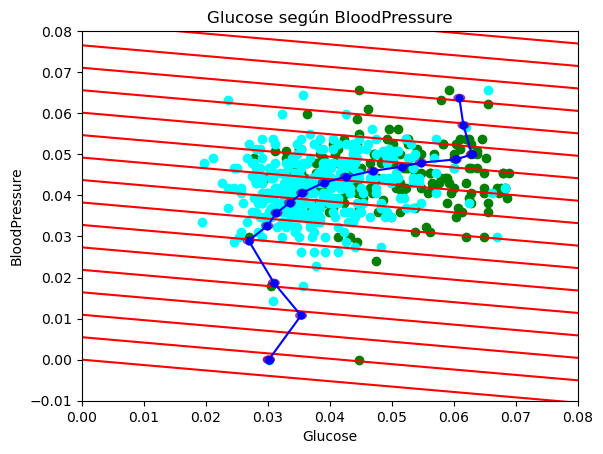

In [27]:
def graficarMapper(col1, col2, iterar):
    plt.figure(figsize=(6,4))

    fig, ax = plt.subplots()

    vecMax = max(dic_imagenes[(col1, col2)])

    for i in iteraciones(iterar):
        x = np.linspace(-.01, 1, 100)
        c = i
        f_x = (c - x)*vecMax
        plt.plot(x, f_x, color="red")
        plt.xlim(0, 0.08)  # Limitar el eje x
        plt.ylim(-.01, 0.08)  # Limitar el eje y
        
    plt.scatter(conDiabetes[col1], conDiabetes[col2], c='green')
    plt.scatter(sinDiabetes[col1], sinDiabetes[col2], c='cyan')
    plt.title(f"{col1} según {col2}")
    plt.xlabel(col1)
    plt.ylabel(col2)

    # Generamos los nodos
    circulos = coordenadasCirc('Glucose', 'BloodPressure', iterar)
    # Graficamos los nodos
    for (pos, radio, color) in circulos:
        circle = plt.Circle(pos, radio, color=color, fill=True, alpha=0.6)
        ax.add_artist(circle)

    x_coords = [pos[0] for pos, _, _ in circulos]
    y_coords = [pos[1] for pos, _, _ in circulos]

    plt.plot(x_coords, y_coords, color="blue", linestyle="-", marker="o", markersize=5, label="Conexión entre puntos")

    plt.show()

for i in range(1,11):
    graficarMapper('Glucose', 'BloodPressure', i)